In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
from skimage import exposure
import nose.tools
import scipy.misc
import scipy.ndimage
import skimage.filters
from skimage.segmentation import flood, flood_fill

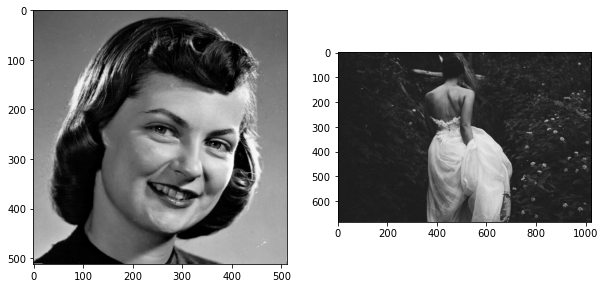

In [2]:
imageGirl = cv2.imread('Girl Face.png', 0)
imageBride = cv2.imread('boda.jpeg', 0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imageGirl, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(imageBride, cmap='gray')

In [3]:
def CompareBounds(x,y):
    max_y=512
    max_x=512
    if x>=0 and x<max_x and y>=0 and y<max_y:
        return True
    else:
        return False

def RegionGrowing(md,matrix,region_matrix,bool_matrix,seedx,seedy,nr,bv):
    if CompareBounds(seedx,seedy)==False: 
        return
    if bool_matrix[seedx,seedy]==1:
        return
    if int(abs(int(matrix[seedx,seedy])-bv))>md:
        return
    
    bool_matrix[seedx,seedy]=1
    region_matrix[seedx,seedy]=nr

       
    RegionGrowing(md,matrix,region_matrix,bool_matrix,seedx+1,seedy,nr,matrix[seedx,seedy])
   
      
    RegionGrowing(md,matrix,region_matrix,bool_matrix,seedx-1,seedy,nr,matrix[seedx,seedy])
   
        
    RegionGrowing(md,matrix,region_matrix,bool_matrix,seedx,seedy+1,nr,matrix[seedx,seedy])
    
        
    RegionGrowing(md,matrix,region_matrix,bool_matrix,seedx,seedy-1,nr,matrix[seedx,seedy])
    return

In [ ]:
region_matrix=np.zeros_like(imageGirl,dtype="int")
bool_matrix=np.zeros_like(imageGirl,dtype="int")
matrix=np.zeros_like(imageGirl,dtype="int")
matrix=imageGirl
md=30
print(matrix.shape)
RegionGrowing(md,matrix,region_matrix,bool_matrix,125,250,255,matrix[125,250])
#region_matrix = flood_fill(matrix, (250, 250), 255,tolerance=10)

#for i in range(0,512):
 #   for j in range(0,512):
    #    if matrix[i,j]<50:
      #      region_matrix[i,j]=255


print(region_matrix)
#plt.figure()
#plt.imshow(region_matrix,cmap="gray")
#plt.show()